In [1]:
import msprime, tskit, time, tsinfer
import pandas as pd
import numpy as np
from IPython.display import SVG
import plotly.graph_objects as go
# from algorithm._metric_ import (node_tree_discrepancy, discrepancy)
# import tsdate
import plotly.io
from tqdm import tqdm
from plotly.subplots import make_subplots
from tqdm import tqdm
from time import time
# from COPYevaluation import node_spans, tree_discrepancy
from tscompare import node_spans, compare
import matplotlib.pyplot as plt

colors = {'blue': 'rgb(46,37,133)',
          'red': 'rgb(194,106,119)',
          'lgreen': 'rgb(93,168,153)',
          'gold': 'rgb(220,205,125)',
          'green': 'rgb(51, 117,56)',
          
          'lblue': 'rgb(148,203,236)',
          'magenta': 'rgb(159,74,150)',
          'wine': 'rgb(126,041,084)', 
         }

/home/hfriz/bioenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Figure 4.
Node spans of simulated tree sequence (blue), simplified tree sequence (green), and extended tree sequence (red).
\comment{TODO: nodes should be in the same order in all three lines,
using the ordering from the true tree sequence.}
\comment{TODO: somehow communicate per-node amount/proportion of correctly and incorrectly added span}

Should be $2\times 2$ subplot. (2nd row is 1 subplot)
1. [x] $(1,1)$ added span per node histogram (removing 0 spans)
2. [x] $(1,2)$ added span vs incorrectly added span subplot (removing 0 spans)
3. [x] $(2,1)$ comparitive spans between truth/simplified
4. [x] $(2,2)$ comparitive spans between truth/simplified-extended

In [4]:
s = tskit.load('trees/ts_1000s_1e8')

In [5]:
s

In [3]:
df = pd.read_csv('figure-data/figure4-nodespans.csv')
tsnodes = df['S-node-span']
added = df['SSE-added-span'].values
addedwrong = df['SSE-added-wrong'].values
stsnodes = df['SS-node-span']
etsnodes = df['SSE-node-span']

In [3]:
np.all(stsnodes.values <= etsnodes.values)

True

In [4]:
df

,Unnamed: 0,S-node-span,SSE-added-span,SSE-added-wrong,SS-node-span,SSE-node-span
0,0,100000000.0,0.0,0.0,100000000.0,100000000.0
1,1,100000000.0,0.0,0.0,100000000.0,100000000.0
2,2,100000000.0,0.0,0.0,100000000.0,100000000.0
3,3,100000000.0,0.0,0.0,100000000.0,100000000.0
4,4,100000000.0,0.0,0.0,100000000.0,100000000.0
...,...,...,...,...,...,...
23646,23646,1743.0,0.0,0.0,1743.0,1743.0
23647,23647,147.0,0.0,0.0,147.0,147.0
23648,23648,3291.0,0.0,0.0,3291.0,3291.0
23649,23649,19540.0,0.0,0.0,13236.0,13236.0


In [4]:
'format'
a = added[added!=0]
w = addedwrong[added!=0]
order = np.argsort(tsnodes)
t = tsnodes[order]
s = stsnodes[order]
e = etsnodes[order]

In [150]:
np.mean(w/a), np.count_nonzero(w)/w.shape[0], w.shape
ww = w[w !=0]
aa = a[w !=0]

In [91]:
np.count_nonzero(addedwrong)/addedwrong.shape[0], addedwrong.shape, np.count_nonzero(addedwrong)

(0.04092850196609023, (23651,), 968)

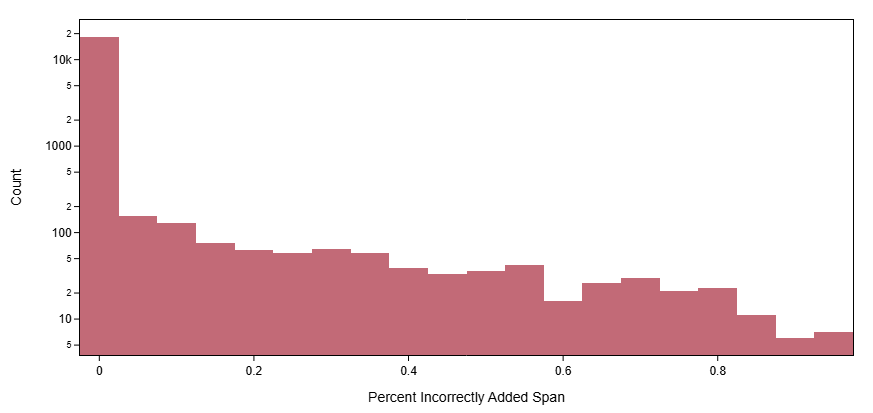

In [156]:
'alt graph'
f = go.Figure()
f.add_trace(go.Histogram(x=(w/a), marker=dict(color=colors['red']), nbinsx=20))
f.update_yaxes(type='log', title='Count')
f.update_xaxes(title='Percent Incorrectly Added Span')
f.update_layout(width=6.5*118.11, height=3.5*118.11)

# choose the figure font
font_dict=dict(family='Arial',
               color='black'
               )
# general figure formatting
f.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )

# x and y-axis formatting
f.update_yaxes(
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=1, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror=True,  # add ticks to top/right axes
                 tickwidth=1,  # tick width
                 tickcolor='black',  # tick color
                 )
f.update_xaxes(
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=1,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror=True,
                 tickwidth=1,
                 tickcolor='black',
                 )

f.show()
plotly.io.write_image(f,'figure-data/Figure4S-plt-includezeros.pdf', format='pdf')

In [ ]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("A)","B)","C)", "D)"),
                   horizontal_spacing=0.13, vertical_spacing=0.14)

fig.add_trace(go.Histogram(x=a, marker=dict(color=colors['red']), nbinsx=20), row=1, col=1)
fig.add_trace(go.Scatter(x=w, y=a, marker=dict(color=colors['red'], size=3, opacity=0.5), mode='markers'), row=1,col=2)
for (data,color,col) in [(e, colors['red'],2), (s, colors['lgreen'],1),(t, colors['blue'],1),(t, colors['blue'],2)]:
    fig.add_trace(go.Scatter(x=np.arange(data.shape[0]), y=data, mode='markers', marker=dict(color=color, opacity=0.3, size=3)), row=2, col=col)

fig.update_layout(width=118.11*6.5, height=118.11*4.5) #change height to make it work
fig.update_xaxes(title= 'Edge Span Added', exponentformat='e', row=1,col=1, title_standoff=3)
fig.update_xaxes(title= 'Percent incorrectly Added Span', exponentformat='e', row=1, col=2, title_standoff=3)
fig.update_yaxes(title= 'Count', type='log', row=1, col=1)
fig.update_yaxes(title="Count", exponentformat='e', row=1, col=2, title_standoff =3)
fig.update_yaxes(title='Node Span', type='log', exponentformat='e', row=2, col=1)
fig.update_yaxes(title='Node Span', type='log', exponentformat='e', row=2, col=2, title_standoff=3)
fig.update_xaxes(title='Rank', row=2,col=1)
fig.update_xaxes(title='Rank', row=2,col=2)
fig.layout.annotations[0].update(x=0.025)
fig.layout.annotations[2].update(x=0.025)
fig.layout.annotations[1].update(x=0.575)
fig.layout.annotations[3].update(x=0.575)
fig.update_layout(showlegend=False)
# plotly.io.write_image(fig,'figure-data/figure-4-2.pdf', format='pdf')

In [49]:
np.count_nonzero(added), added.shape, np.max(added), np.max(addedwrong)

(19303, (23651,), 99736095.0, 49937267.0)

In [59]:
addedcorrect = a-w
propincorrect = w/a

In [64]:
np.count_nonzero(propincorrect), np.mean(propincorrect)

(968, 0.014196537198293906)

In [6]:
# No removal of extra zeros
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("A)","B)","C)", "D)"),
                   horizontal_spacing=0.13, vertical_spacing=0.14)

fig.add_trace(go.Histogram(x=added, marker=dict(color=colors['red']), nbinsx=20), row=1, col=1)
fig.add_trace(go.Scatter(x=added+1, y=addedwrong+1, marker=dict(color=colors['red'], size=3, opacity=0.2), mode='markers'), row=1,col=2)
fig.add_trace(go.Scatter(x=np.linspace(0,1e8,num=1000), y = np.linspace(0,1e8,num=1000), mode='lines', marker=dict(color=colors['blue'])), row=1,col=2)
fig.add_trace(go.Histogram(x=(w/a), marker=dict(color=colors['red']), nbinsx=20), row=1, col=2)
fig.update_yaxes(type='log', title='Count', row=1,col=2)
fig.update_xaxes(title='Percent Incorrectly Added Span', row=1, col=2)
for (data,color,col) in [(e, colors['red'],2), (s, colors['lgreen'],1),(t, colors['blue'],1),(t, colors['blue'],2)]:
    fig.add_trace(go.Scatter(x=np.arange(data.shape[0]), y=data, mode='markers', marker=dict(color=color, opacity=0.3, size=3)), row=2, col=col)

fig.update_layout(width=118.11*6.5, height=118.11*4.5) #change height to make it work
fig.update_xaxes(title= 'Edge Span Added', exponentformat='e', row=1,col=1, title_standoff=3)
fig.update_xaxes(title= 'Added Span', type='log', exponentformat='e', row=1, col=2, title_standoff=3,
                tickmode='array', tickvals = np.array([1,100,1e4,1e6,1e8]),ticktext=['1', '100', '1e+4', '1e+6', '1e+8'])
fig.update_yaxes(title= 'Count', type='log', row=1, col=1)
fig.update_yaxes(title="Incorrectly Added Span", type='log', exponentformat='e', row=1, col=2, title_standoff =3,
                tickmode='array', tickvals = np.array([1,100,1e4,1e6,1e8]), ticktext=['1', '100', '1e+4', '1e+6', '1e+8'])
fig.update_yaxes(title='Node Span', type='log', exponentformat='e', row=2, col=1)
fig.update_yaxes(title='Node Span', type='log', exponentformat='e', row=2, col=2, title_standoff=3)
fig.update_xaxes(title='Rank', row=2,col=1)
fig.update_xaxes(title='Rank', row=2,col=2)
fig.layout.annotations[0].update(x=0.025)
fig.layout.annotations[2].update(x=0.025)
fig.layout.annotations[1].update(x=0.575)
fig.layout.annotations[3].update(x=0.575)
fig.update_layout(showlegend=False)

# choose the figure font
font_dict=dict(family='Arial',
               color='black'
               )
# general figure formatting
fig.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )

# x and y-axis formatting
fig.update_yaxes(
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=1, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror=True,  # add ticks to top/right axes
                 tickwidth=1,  # tick width
                 tickcolor='black',  # tick color
                 )
fig.update_xaxes(
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=1,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror=True,
                 tickwidth=1,
                 tickcolor='black',
                 )

plotly.io.write_image(fig,'figure-data/Figure4-plt.pdf', format='pdf')

## Figure 5

Dissimilarity $(2\times 2)$ subplot. For each plot we want dissimilarity between 
 - S v SS
 - S v SSE
 - S v I
 - S v IS
 - S v IE
 - S v ISE

1. [x] The first row of plots will be the dissimilarity over sample $(1,1)$ and number of trees $(1,2)$.
2. [x] The second row of plots will be the true proportion represented over sample $(2,1)$ and number of trees $(2,2)$.

In [2]:
samplelist = [10, 50, 100, 500, 1000]
sample_dis = pd.DataFrame(columns = samplelist, index=['S-v-SS', 'S-v-SSE', 'S-v-I', 'S-v-IS', 'S-v-ISE'])
sample_rmse = pd.DataFrame(columns = samplelist, index=['S-v-SS', 'S-v-SSE', 'S-v-I', 'S-v-IS', 'S-v-ISE'])
sample_true_prop = pd.DataFrame(columns = samplelist, index=['S-v-SS', 'S-v-SSE', 'S-v-I', 'S-v-IS', 'S-v-ISE'])

In [3]:
'Redo the dissimilarity computations'
samplelist = [10, 50, 100, 500, 1000]
for sample in samplelist:
    s = tskit.load(f'trees/ts2_{sample}s_5e7_nounary')
    i = tskit.load(f'trees/infer_ts2_{sample}s_5e7_nounary')
    print(sample)
    sample_dis.loc['S-v-I', sample], sample_rmse.loc['S-v-I', sample], sample_true_prop.loc['S-v-I', sample] = tree_discrepancy(i,s)
    print('.')
    ss = s.simplify()
    sample_dis.loc['S-v-SS', sample], sample_rmse.loc['S-v-SS', sample], sample_true_prop.loc['S-v-SS',sample] = tree_discrepancy(ss,s)
    print('..')
    sse = ss.extend_paths()
    sample_dis.loc['S-v-SSE',sample], sample_rmse.loc['S-v-SSE', sample], sample_true_prop.loc['S-v-SSE', sample] = tree_discrepancy(sse,s)
    print('...')
    iis = i.simplify()
    sample_dis.loc['S-v-IS', sample], sample_rmse.loc['S-v-IS', sample], sample_true_prop.loc['S-v-IS', sample] = tree_discrepancy(iis,s)
    print('....')
    ise = iis.extend_paths()
    sample_dis.loc['S-v-ISE', sample], sample_rmse.loc['S-v-ISE', sample], sample_true_prop.loc['S-v-ISE', sample] = tree_discrepancy(ise,s)
sample_dis.to_csv('figure-data/figure5-dissimilarity.csv')
sample_rmse.to_csv('figure-data/figure5-rmse.csv')
sample_true_prop.to_csv('figure-data/figure5-true-prop.csv')

10
.
..
...
....
50
.
..
...
....
100
.
..
...
....
500
.
..
...
....
1000
.
..
...
....


In [33]:
lengthlist = [1e6, 5e6, 1e7, 3e7, 5e7]
names = ['1e6', '5e6', '1e7', '3e7', '5e7']
length_dis = pd.DataFrame(columns = names, index=['S-v-SS', 'S-v-SSE', 'S-v-I', 'S-v-IS', 'S-v-ISE'])
length_rmse = pd.DataFrame(columns = names, index=['S-v-SS', 'S-v-SSE', 'S-v-I', 'S-v-IS', 'S-v-ISE'])
length_true_prop = pd.DataFrame(columns = names, index=['S-v-SS', 'S-v-SSE', 'S-v-I', 'S-v-IS', 'S-v-ISE'])

In [7]:
ts = msprime.sim_ancestry(1000, population_size=1000, sequence_length=3e7,
                            recombination_rate=1e-8, coalescing_segments_only=False)
ts.dump(f'trees/ts_1000s_3e7')
mutation_rate = 1e-7  # mutation rate for the inferred tree sequences
ts = msprime.sim_mutations(ts, mutation_rate)
infer_ts = tsinfer.infer(tsinfer.SampleData.from_tree_sequence(ts))
t = infer_ts.tables
t.compute_mutation_times()
infer_ts = t.tree_sequence()
infer_ts.dump(f'trees/infer_ts_1000s_3e7')

In [35]:
lengthlist = [1e6, 5e6, 1e7, 3e7, 5e7]
names = ['1e6', '5e6', '1e7', '3e7', '5e7']
for (length, name) in zip(lengthlist, names):
    s = tskit.load(f'trees/ts_1000s_{name}_nounary')
    i = tskit.load(f'trees/infer_ts_1000s_{name}_nounary')
    print(name)
    length_dis.loc['S-v-I', name], length_rmse.loc['S-v-I', name], length_true_prop.loc['S-v-I', name] = tree_discrepancy(i,s)
    print('.')
    ss = s.simplify()
    length_dis.loc['S-v-SS', name], length_rmse.loc['S-v-SS', name], length_true_prop.loc['S-v-SS', name] = tree_discrepancy(ss,s)
    print('..')
    sse = ss.extend_paths()
    length_dis.loc['S-v-SSE',name], length_rmse.loc['S-v-SSE',name], length_true_prop.loc['S-v-SSE', name] = tree_discrepancy(sse,s)
    print('...')
    iis = i.simplify()
    length_dis.loc['S-v-IS', name], length_rmse.loc['S-v-IS', name], length_true_prop.loc['S-v-IS', name] = tree_discrepancy(iis,s)
    print('....')
    ise = iis.extend_paths()
    length_dis.loc['S-v-ISE', name], length_rmse.loc['S-v-ISE', name], length_true_prop.loc['S-v-ISE', name] = tree_discrepancy(ise,s)
length_dis.to_csv('figure-data/figure5-dissimilarity-over-length.csv')
length_rmse.to_csv('figure-data/figure5-rmse-over-length.csv')
length_true_prop.to_csv('figure-data/figure5-true-prop-over-length.csv')

1e6
.
..
...
....
5e6
.
..
...
....
1e7
.
..
...
....
3e7
.
..
...
....
5e7
.
..
...
....


In [24]:
# sample_dis = pd.read_csv('figure-data/figure5-dissimilarity.csv')
# sample_tp = pd.read_csv('figure-data/figure5-true-prop.csv')
# sample_rmse = pd.read_csv('figure-data/figure5-rmse.csv')
length_dis = pd.read_csv('figure-data/figure5-dissimilarity-over-length.csv')
length_tp = pd.read_csv('figure-data/figure5-true-prop-over-length.csv')
length_rmse = pd.read_csv('figure-data/figure5-rmse-over-length.csv')
lengthlist = [1e6, 5e6, 1e7, 3e7, 5e7]
samplelist = [10, 50, 100, 500, 1000]

In [6]:
lengthlist = [1e6, 5e6, 1e7, 3e7, 5e7]
names = ['1e6', '5e6', '1e7', '3e7', '5e7']

for (x, length, name) in zip(np.arange(5), lengthlist, names):
    # s = tskit.load(f'trees/ts_1000s_{name}_nounary')
    i = tskit.load(f'trees/infer_ts_1000s_{name}_nounary')
    ie = i.extend_paths()
    ise = i.simplify().extend_paths()
    print(name, i.num_edges, ise.num_edges, ie.num_edges)
    

1e6 3618 3558 3554
5e6 9551 9069 9033
1e7 17884 16691 16656
3e7 50255 46420 46024
5e7 81837 75372 74747


In [ ]:
dis, rmse, tp = np.zeros(6), np.zeros(6), np.zeros(6)
for x, sample in enumerate(samplelist):
    s = tskit.load(f'trees/ts2_{sample}s_5e7_nounary')
    i = tskit.load(f'trees/infer_ts2_{sample}s_5e7_nounary')
    print('sample')
    ie = i.extend_paths()
    print('..')
    dis[x], rmse[x], tp[x] = tree_discrepancy(ie,s)

In [22]:
new_tp=new_true_prop

In [35]:
new_drow = {'Unnamed: 0': 'S-v-IE', '10': dis[0], '50': dis[1], '100': dis[2], '500': dis[3], '1000': dis[4]}
new_rrow = {'Unnamed: 0': 'S-v-IE', '10': rmse[0], '50': rmse[1], '100': rmse[2], '500': rmse[3], '1000': rmse[4]}
new_trow = {'Unnamed: 0': 'S-v-IE', '10': tp[0], '50': tp[1], '100': tp[2], '500': tp[3], '1000': tp[4]}

sample_dis=sample_dis._append(new_drow, ignore_index=True)
sample_rmse=sample_rmse._append(new_rrow, ignore_index=True)
sample_tp=sample_tp._append(new_trow, ignore_index=True)

In [36]:
sample_dis

,Unnamed: 0,10,50,100,500,1000
0,S-v-SS,0.000000,0.000000,0.000000,0.000000,0.000000
1,S-v-SSE,0.019571,0.006282,0.003540,0.001020,0.000410
2,S-v-I,0.293068,0.283088,0.283017,0.244347,0.218617
3,S-v-IS,0.103697,0.097233,0.100097,0.096571,0.089595
4,S-v-ISE,0.206418,0.200018,0.205981,0.181809,0.161995
5,S-v-IE,0.311198,0.303782,0.305792,0.262820,0.234872


In [3]:
samplelist = [10, 50, 100, 500, 1000]
lengthlist = [1e6, 5e6, 1e7, 3e7, 5e7]
names = ['1e6', '5e6', '1e7', '3e7', '5e7']
sample_dis = pd.read_csv('figure6-arf-over-sample.csv')
# sample_rmse = pd.read_csv('figure-data/figure5-rmse.csv')
sample_tp = pd.read_csv('figure6-tpr-over-sample.csv')
length_dis = pd.read_csv('figure6-arf-over-length.csv')
# length_rmse = pd.read_csv('figure-data/figure5-rmse-over-length.csv')
length_tp = pd.read_csv('figure6-tpr-over-length.csv')

In [6]:
length_dis.head()

,Unnamed: 0,1e6,5e6,1e7,3e7,5e7
0,S,0.000000,0.000000,0.000000,0.000000,0.000000
1,SE,0.000456,0.000266,0.000514,0.000501,0.000632
2,I,0.056100,0.126387,0.153706,0.203173,0.219681
3,IE,0.060085,0.139343,0.165980,0.218123,0.236560
4,IS,0.028894,0.056390,0.070158,0.085372,0.088550


In [7]:
sample_dis.columns

Index(['Unnamed: 0', '10', '50', '100', '500', '1000'], dtype='object')

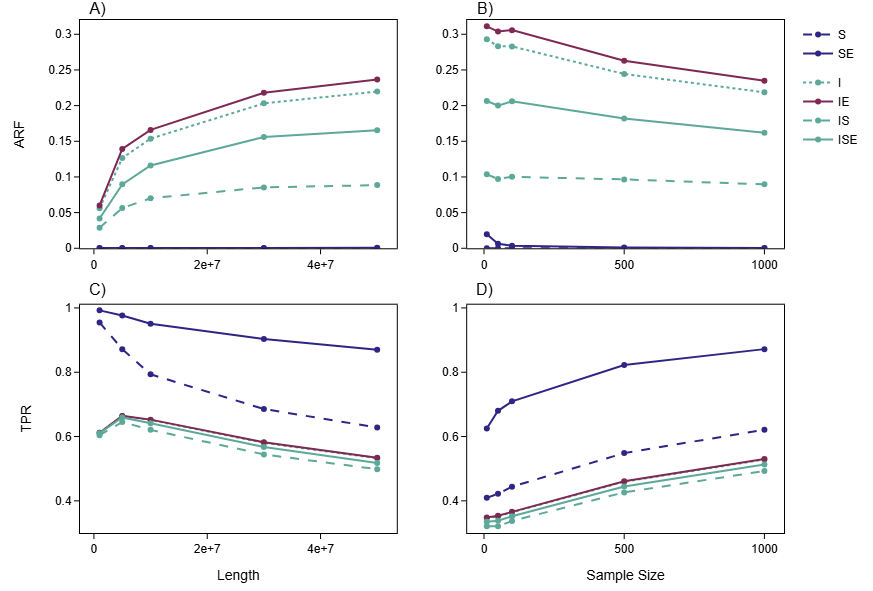

In [5]:
f = make_subplots(rows = 2, cols =2,
                  vertical_spacing=0.11,
                  subplot_titles=['A)','B)','C)','D)'])
for (i, name, group, color, dash, boo) in zip(sample_dis.index, 
                                         ['S','SE','I','IE','IS', 'ISE'],
                                         ['S', 'S', 'I', 'I', 'I', 'I'],
                                         ['blue', 'blue', 'lgreen', 'wine','lgreen', 'lgreen'],
                                         ['dash', None, 'dot', None, 'dash', None],
                                         [True, False, False, False, False, False]):
    f.add_trace(go.Scatter(
        x=lengthlist, y = length_dis.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=True), row=1, col=1)
    f.add_trace(go.Scatter(
        x=lengthlist, y = length_tp.iloc[i].values[1:],
        mode='lines+markers',line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=False), row=2, col=1)
    f.add_trace(go.Scatter(
        x=samplelist, y=sample_dis.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color],dash=dash),
        legendgroup=group, name=name, showlegend=False), row=1, col=2)
    f.add_trace(go.Scatter(
        x=samplelist, y=sample_tp.iloc[i].values[1:],
        mode='lines+markers', line=dict(color=colors[color], dash=dash),
        legendgroup=group, name=name, showlegend=False), row=2, col=2)
f.update_xaxes(title='Sample Size', row=2, col=2)
f.update_yaxes(title='ARF', row=1, col=1, range=[0,0.32])
f.update_yaxes(row=1,col=2, range=[0,0.32])
f.update_yaxes(title='TPR', row=2,col=1, range=[0.3,1.01])
f.update_yaxes(row=2,col=2,range=[0.3,1.01])
f.update_xaxes(title='Length', row=2,col=1, exponentformat='e')
f.update_xaxes(row=1, col=1, exponentformat='e')

f.update_layout(width=118.11*6.5, height=118.11*5)
# f.layout.annotations[0].update(x=-0.03)
# f.layout.annotations[2].update(x=-0.03)
# f.layout.annotations[1].update(x=0.525)
# f.layout.annotations[3].update(x=0.525)
f.layout.annotations[0].update(x=0.025,y=1.001)
f.layout.annotations[2].update(x=0.025,y=0.455)
f.layout.annotations[1].update(x=0.575,y=1.001)
f.layout.annotations[3].update(x=0.575,y=0.455)

# choose the figure font
font_dict=dict(family='Arial',
               color='black'
               )
# general figure formatting
f.update_layout(font=font_dict,  # font formatting
                  plot_bgcolor='white',  # background color
                  margin=dict(r=20,t=20,b=10)  # remove white space 
                  )

# x and y-axis formatting
f.update_yaxes(
                 showline=True,  # add line at x=0
                 linecolor='black',  # line color
                 linewidth=1, # line size
                 ticks='outside',  # ticks outside axis
                 tickfont=font_dict, # tick label font
                 mirror=True,  # add ticks to top/right axes
                 tickwidth=1,  # tick width
                 tickcolor='black',  # tick color
                 )
f.update_xaxes(
                 showline=True,
                 showticklabels=True,
                 linecolor='black',
                 linewidth=1,
                 ticks='outside',
                 tickfont=font_dict,
                 mirror=True,
                 tickwidth=1,
                 tickcolor='black',
                 )

f.show()

f.write_image('figure6-ARF-TPR-plt2.pdf', format='pdf', width=118.11*6.5, height=4.5*118.11)